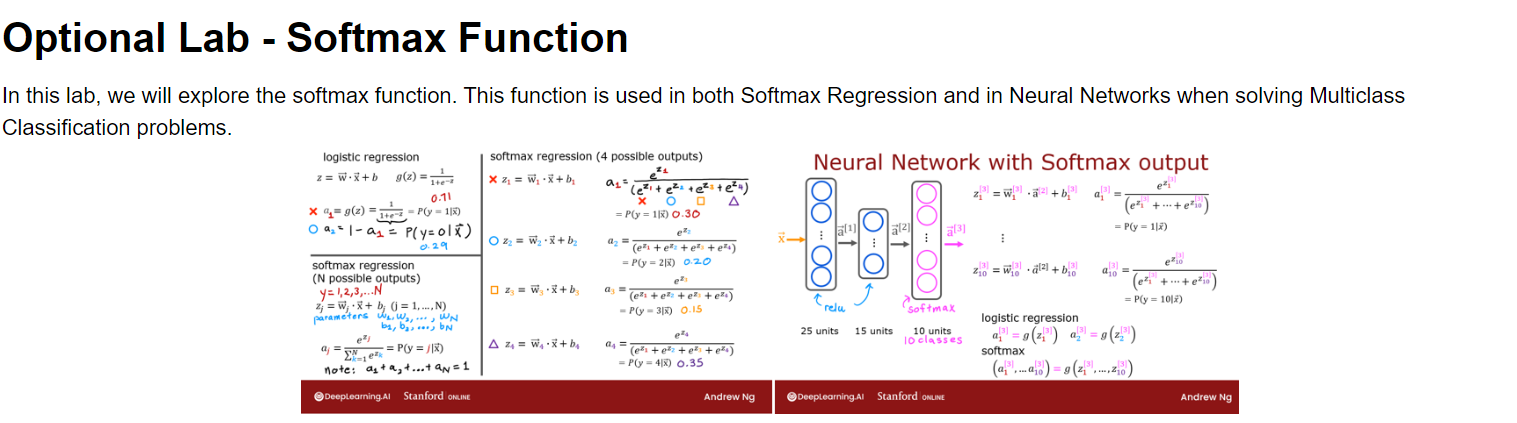

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

> **Note**: Normally, in this course, the notebooks use the convention of starting counts with 0 and ending with N-1,  $\sum_{i=0}^{N-1}$, while lectures start with 1 and end with N,  $\sum_{i=1}^{N}$. This is because code will typically start iteration with 0 while in lecture, counting 1 to N leads to cleaner, more succinct equations. This notebook has more equations than is typical for a lab and thus  will break with the convention and will count 1 to N.

## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.
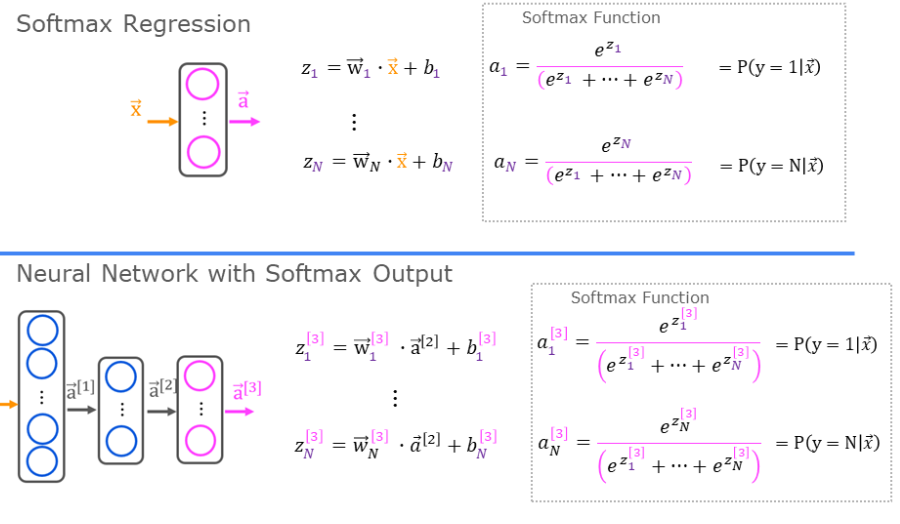

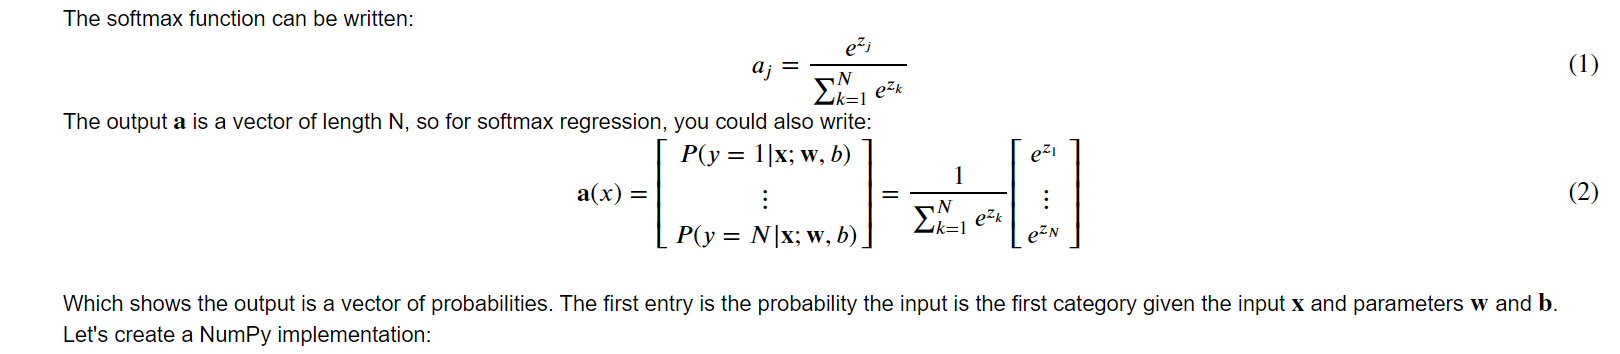

In [3]:
def my_softmax(z):
    ez=np.exp(z)
    sm=ez/np.sum(ez)
    return (sm)

Below, vary the values of the `z` inputs using the sliders.

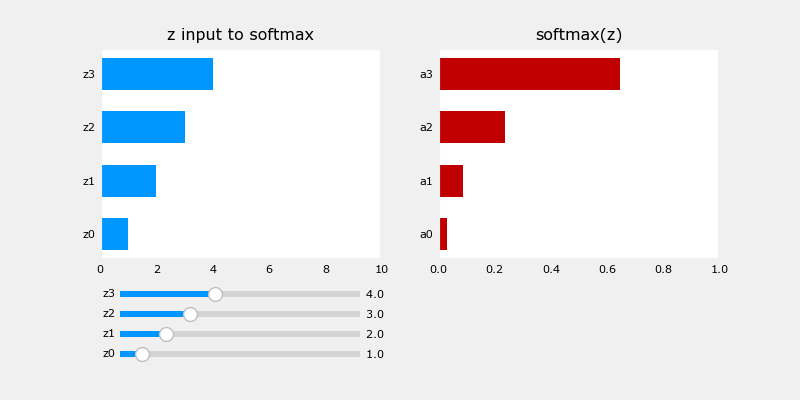

In [4]:
plt.close('all')
plt_softmax(my_softmax)

As you are varying the values of the z's above, there are a few things to note:
* the exponential in the numerator of the softmax magnifies small differences in the values 
* the output values sum to one
* the softmax spans all of the outputs. A change in `z0` for example will change the values of `a0`-`a3`. Compare this to other activations such as ReLU or Sigmoid which have a single input and single output.

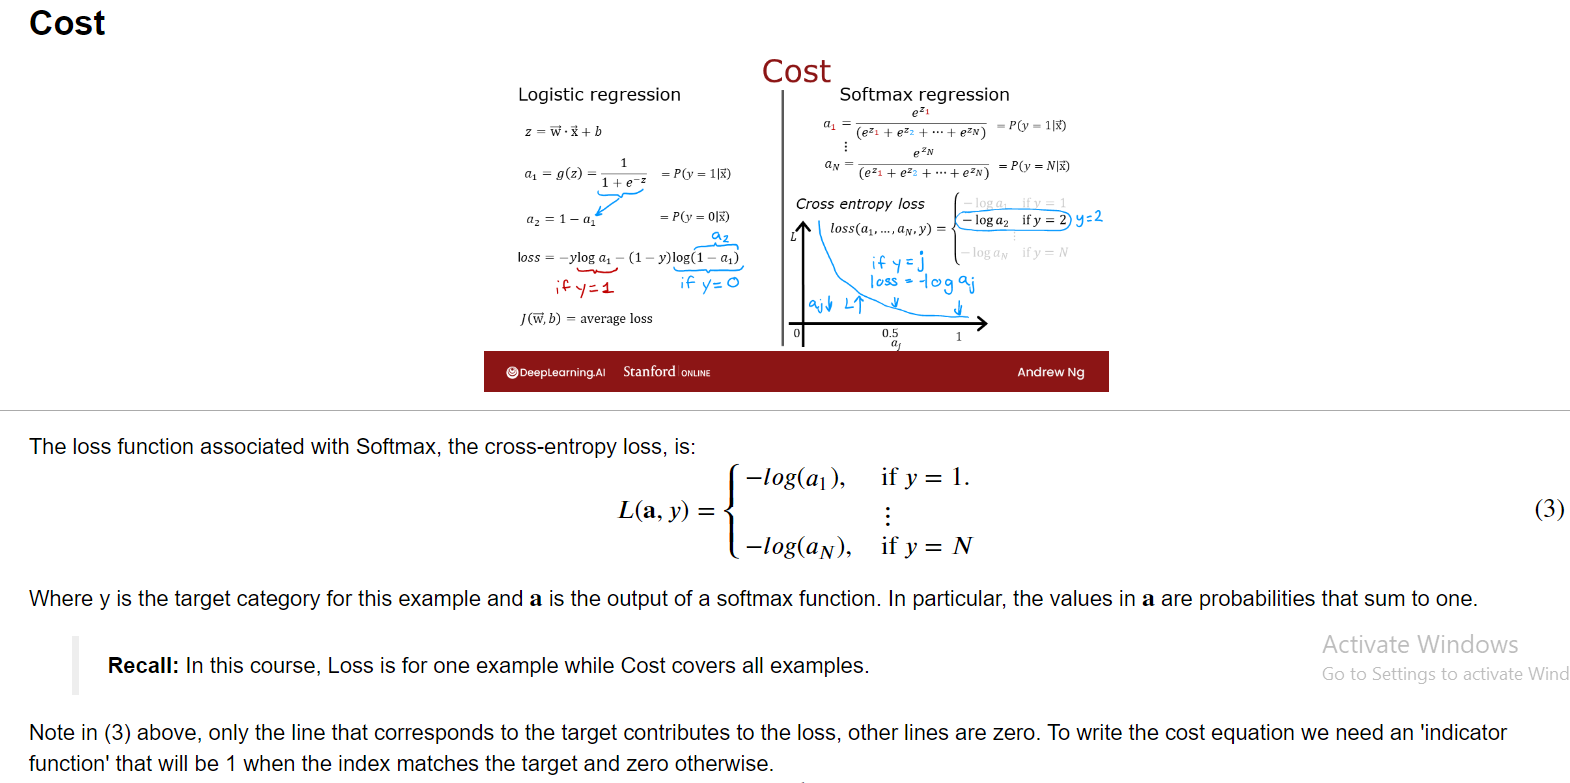

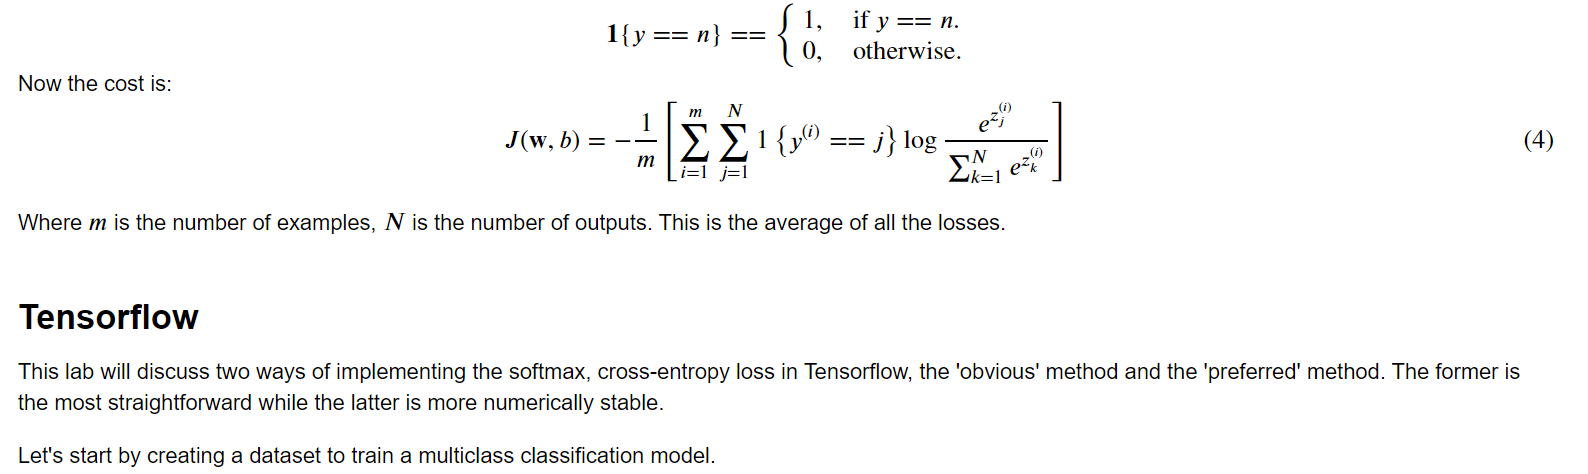

In [8]:
#Make a dataset for example 
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train=make_blobs(n_samples=2000,centers=centers, cluster_std=1.0, random_state=30)

### The *Obvious* organization
The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities. 

In [10]:
model=Sequential(
    [
        Dense(25,activation='relu'),
        Dense(25,activation='relu'),
        Dense(25,activation='softmax')
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10 
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 2.0312
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5119
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1676
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1011
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0587
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0448


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [11]:
p_nonpreferred=model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 901us/step
[[1.73e-03 1.09e-03 9.75e-01 1.86e-02 3.63e-05 3.81e-04 5.88e-05 1.76e-04
  1.85e-04 6.34e-05 5.27e-04 9.75e-05 3.56e-04 1.90e-04 1.56e-04 3.50e-05
  2.42e-04 4.06e-04 1.56e-04 8.32e-05 1.22e-04 5.46e-05 3.69e-05 1.11e-04
  1.79e-04]
 [9.92e-01 7.46e-03 1.28e-04 1.80e-05 6.36e-08 8.38e-08 2.38e-08 4.00e-08
  2.59e-10 3.12e-07 4.67e-09 3.37e-07 2.57e-07 1.14e-08 2.27e-08 4.17e-10
  1.06e-07 1.80e-05 2.53e-08 1.21e-06 6.01e-10 9.51e-10 5.51e-10 1.17e-07
  2.83e-07]]
largest value 0.9999991 smallest value 2.0092538e-17


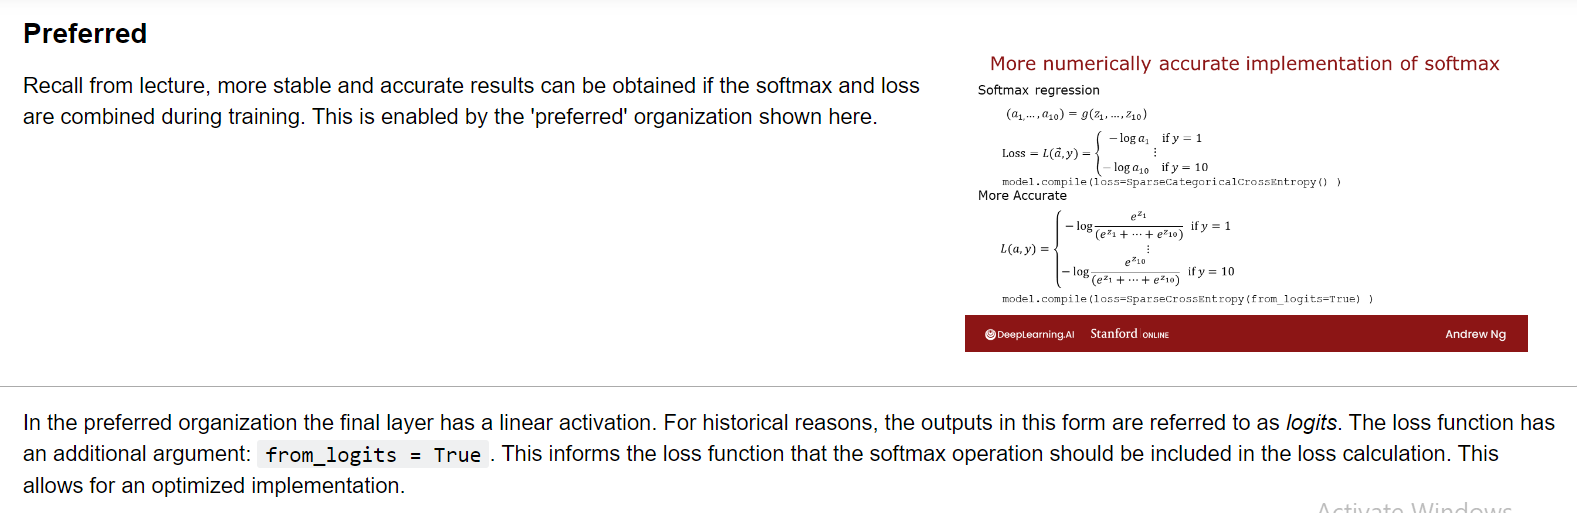

In [12]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
     

Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 1.0825
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4824
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2129
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1091
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0766
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0381


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [13]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 837us/step
two example output vectors:
 [[ -3.61  -2.84   2.57  -1.25]
 [  7.35   2.45  -1.11 -10.79]]
largest value 13.6618185 smallest value -18.986591


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [14]:
sm_preferred = tf.nn.softmax(p_preferred).numpy() # softmax is called here 
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[2.02e-03 4.35e-03 9.72e-01 2.13e-02]
 [9.92e-01 7.41e-03 2.10e-04 1.32e-08]]
largest value 0.9999986 smallest value 9.6858565e-15


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [15]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-3.61 -2.84  2.57 -1.25], category: 2
[  7.35   2.45  -1.11 -10.79], category: 0
[ 5.18  2.36 -0.9  -8.42], category: 0
[-1.95  4.1  -1.07 -2.86], category: 1
[-1.07 -5.14  4.59 -6.73], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

## Congratulations!
In this lab you 
- Became more familiar with the softmax function and its use in softmax regression and in softmax activations in neural networks. 
- Learned the preferred model construction in Tensorflow:
    - No activation on the final layer (same as linear activation)
    - SparseCategoricalCrossentropy loss function
    - use from_logits=True
- Recognized that unlike ReLU and Sigmoid, the softmax spans multiple outputs.
